要使用PyTorch进行卷积神经网络（CNN）的训练，您需要按照以下步骤操作：

1. **定义数据集类**：如果您有自定义的数据集，您需要使用`torch.utils.data.Dataset`来封装您的数据和标签。
2. **构建CNN模型**：定义一个继承自`torch.nn.Module`的类来构建您的CNN。
3. **定义损失函数和优化器**：选择适合您任务的损失函数和优化器。
4. **训练模型**：编写训练循环，使用您的数据训练模型。
5. **评估模型**：在验证集或测试集上评估模型的性能。

下面是一个简化的例子，展示如何使用PyTorch进行这一过程：

### 步骤 1: 定义数据集类

```python
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y
```

### 步骤 2: 构建CNN模型

```python
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
```

### 步骤 3: 定义损失函数和优化器

```python
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
```

### 步骤 4: 训练模型

```python
def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        for data, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Assuming your data and labels are numpy arrays
from sklearn.model_selection import train_test_split

data, labels = ... # your data and labels

# Convert data and labels to PyTorch tensors
data = torch.tensor(data, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.long)

# Create dataset and dataloader
dataset = CustomDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Train your model
train_model(model, dataloader, criterion, optimizer)
```

### 步骤 5: 评估模型

这一步通常涉及在一个独立的测试集上运行模型，并使用例如准确率这样的指标来评估性能。

请注意，这个例子假设您的数据是图像数据，且已经适当地归一化和预处理。您可能需要根据您的具体数据和任务调整CNN结构、损失函数和其他参数。


模型训练完成后，使用测试数据进行模型评估是检查模型泛化能力的重要步骤。下面是一个详细的步骤说明，展示如何在PyTorch中使用测试数据对一个训练好的模型进行评估。

### 步骤 1: 准备测试数据
确保你的测试数据集已经按照和训练数据相同的方式进行预处理。这包括数据的归一化、重塑等步骤。然后，使用`DataLoader`来加载测试数据，这样可以方便地在评估过程中批量处理数据。

```python
from torch.utils.data import DataLoader, TensorDataset
import torch

# 假设 test_data 和 test_labels 已经被正确处理并转换为Tensor
test_dataset = TensorDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
```

### 步骤 2: 设置模型为评估模式
在评估之前，确保将模型设置为评估模式。这样可以关闭如Dropout和Batch Normalization等只在训练时有用的层。

```python
model.eval()
```

### 步骤 3: 评估模型
关闭梯度计算，使用测试数据集来评估模型的性能。通常，我们会计算并记录诸如准确率、损失等指标。

```python
import torch.nn.functional as F

correct = 0
total = 0
total_loss = 0.0

with torch.no_grad():  # 关闭梯度计算
    for data, labels in test_loader:
        outputs = model(data)
        loss = F.cross_entropy(outputs, labels)  # 计算损失
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

average_loss = total_loss / len(test_loader)
accuracy = correct / total
print(f'Accuracy of the model on the test data: {100 * accuracy}%')
print(f'Average loss: {average_loss}')
```

### 步骤 4: 分析结果
根据模型在测试集上的表现来分析模型的性能。高准确率和低损失指示模型有较好的泛化能力。如果模型在训练集上表现良好，但在测试集上表现不佳，则可能存在过拟合。

### 步骤 5: 进一步的测试
根据需要进行更多的测试，例如混淆矩阵、精确度、召回率和F1分数等，这些都可以帮助你更全面地了解模型的性能。

通过这些步骤，你可以有效地评估你的模型，并根据测试结果进行必要的调整和优化。这是确保模型在实际应用中能够可靠工作的关键步骤。


# 完整工程展示

Using cuda device


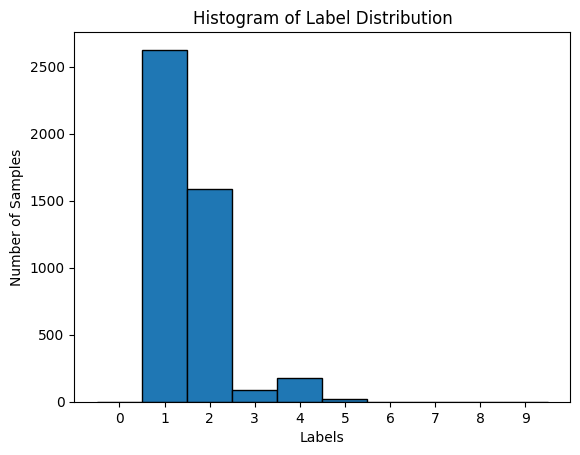

Epoch 1, Loss: 0.17170879244804382
Epoch 2, Loss: 0.13016089797019958
Epoch 3, Loss: 0.03124133311212063
Epoch 4, Loss: 0.4504210948944092
Epoch 5, Loss: 0.05827496200799942
Epoch 6, Loss: 0.051519520580768585
Epoch 7, Loss: 0.2911498546600342
Epoch 8, Loss: 0.08329875022172928
Epoch 9, Loss: 0.26990848779678345
Epoch 10, Loss: 0.06558991223573685
Epoch 11, Loss: 0.027279380708932877
Epoch 12, Loss: 0.22659511864185333
Epoch 13, Loss: 0.18137647211551666
Epoch 14, Loss: 0.02056701108813286
Epoch 15, Loss: 0.7900844812393188
Epoch 16, Loss: 0.15814658999443054
Epoch 17, Loss: 0.20824000239372253
Epoch 18, Loss: 0.023477468639612198
Epoch 19, Loss: 0.198168084025383
Epoch 20, Loss: 0.07475628703832626
Accuracy of the model on the test data: 95.8%
Average loss: 0.16925607572193258


In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt 


# 检查CUDA是否可用，如果可用则使用CUDA，否则使用CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

''' 
自定义数据集，需要定义好‘__getitem__’函数
'''
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y
    
    
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 32 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
def train_model(model, dataloader, criterion, optimizer, num_epochs=20):
    model.train()
    model.to(device)  # Move the model to the device (GPU or CPU)
    for epoch in range(num_epochs):
        for data, labels in dataloader:
            if device.type == 'cuda':
                data, labels = data.to(device), labels.to(device)  # Move data and labels to the device
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')
        

# 读取数据集
data_train = np.loadtxt('./ECG5000/data/ECG5000_TEST.txt')

# 获取data和label
X_train, y_train = data_train[:, 1:], data_train[:, 0]

new_X_train = np.zeros([4500, 16, 16])
new_X_train[:,0:10, 0:14] = X_train.reshape([4500,10,14])

data, labels = new_X_train, y_train

# Convert data and labels to PyTorch tensors
data = torch.tensor(data, dtype=torch.float32).unsqueeze(1)
labels = torch.tensor(labels, dtype=torch.long)

# Create dataset and dataloader
dataset = CustomDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Plotting the histogram of the labels
plt.hist(labels.numpy(), bins=np.arange(11)-0.5, edgecolor='black')
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Histogram of Label Distribution')
plt.xticks(np.arange(10))
plt.show()


# 定义模型，损失函数以及优化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train your model
train_model(model, dataloader, criterion, optimizer)


# 读取测试数据集
data_train = np.loadtxt('./ECG5000/data/ECG5000_TRAIN.txt')

# 获取data和label
X_test, y_test = data_train[:, 1:], data_train[:, 0]

# 评估模型
new_X_test = np.zeros([500, 16, 16])
new_X_test[:,0:10, 0:14] = X_test.reshape([500,10,14])

test_data, test_labels = new_X_test, y_test
test_data = torch.tensor(test_data, dtype=torch.float32).unsqueeze(1)
test_labels = torch.tensor(test_labels, dtype=torch.long)

test_dataset = CustomDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model.eval()

correct = 0
total = 0
total_loss = 0.0

y_pred = []
y_true = []

with torch.no_grad():  # 关闭梯度计算
    for data, labels in test_loader:
        if device.type == 'cuda':
            data, labels = data.to(device), labels.to(device)  # Move data and labels to the device
        outputs = model(data)
        loss = F.cross_entropy(outputs, labels)  # 计算损失
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        y_pred.extend(predicted.cpu().numpy())  # 收集预测结果
        y_true.extend(labels.cpu().numpy())     # 收集真实标签

average_loss = total_loss / len(test_loader)
accuracy = correct / total
print(f'Accuracy of the model on the test data: {100 * accuracy}%')
print(f'Average loss: {average_loss}')

/tmp/ipykernel_62743/863788986.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_pred)))
/tmp/ipykernel_62743/863788986.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_pred)))


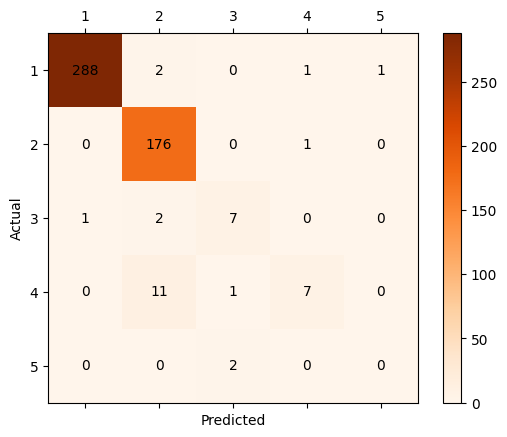

In [12]:
from sklearn.metrics import confusion_matrix

# 使用matplotlib绘制混淆矩阵
# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Oranges)  # 选择颜色映射

# 为图添加颜色条
plt.colorbar(cax)

# 设置坐标轴
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels([''] + list(np.unique(y_pred)))
ax.set_yticklabels([''] + list(np.unique(y_pred)))

# 在混淆矩阵的各个单元格中添加数值标签
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# 显示图表
plt.show()